# PROJECT TITLE: HEALTHCARE DATA INSIGHTS 

### PURPOSE : 

This database describe about the data collected from a healthcarecenter conducted by Apollo Hospitals as a one day camp during Monsoon. It also tells about the data about the Patients, Doctors, Medical Reports, Treatment Status,Prescription, and Bill. The main aim of this is to find out the most common disease, by which people are suffering from during seasonal changes.

### Step 1 : Import required libraries

In [11]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

###  Step 2: Connecting to MySQL database

In [4]:
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
user='root',
password='Pavani@8902',
host='localhost',
database='healthcarecenterdata'
)

### Step 3: Data View

In [5]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'patients' table
cursor.execute('SELECT * FROM patients')
#After fetching data from the database we are storing it into Pandas DataFrame
patients_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(patients_data.head())

   patient_Id  patient_name Age  Gender       Phone Hospital_admitted
0           1   Aarav Mehta  30    Male  9876543210   Apollo Hospital
1           2  Aisha Sharma  25  Female  9876543211   Apollo Hospital
2           3  Ananya Patel  28  Female  9876543212   Apollo Hospital
3           4   Arjun Reddy  35    Male  9876543213   Apollo Hospital
4           5  Deepak Singh  40    Male  9876543214   Apollo Hospital


In [6]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'doctors' table
cursor.execute('SELECT * FROM doctors')
#After fetching data from the database we are storing it into Pandas DataFrame
doctors_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(doctors_data.head())

   doctorID      doctorname            Specialization       Phone  \
0       101    Anusha Patel  Critical Care Physicians  9876543210   
1       102      Imran Jain       General Practioners  9876543211   
2       103  Swapna Katugul    Emergency Room Doctors  9876543212   
3       104    Nirnaya Sake       General Practioners  9876543213   
4       105  Jagruthi Menon  Critical Care Physicians  9876543214   

     Duty_hospital Experience  
0  Apollo Hospital   15 years  
1  Apollo Hospital   10 years  
2  Apollo Hospital    8 years  
3  Apollo Hospital   12 years  
4  Apollo Hospital   20 years  


In [7]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'medical_report' table
cursor.execute('SELECT * FROM medical_report')
#After fetching data from the database we are storing it into Pandas DataFrame
medical_report_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(medical_report_data.head())

   patient_Id  patient_name      doctorname  doctorID         Disease  \
0           1   Aarav Mehta    Anusha Patel       101           Fever   
1           2  Aisha Sharma    Anusha Patel       101        Headache   
2           3  Ananya Patel      Imran Jain       102    Stomach ache   
3           4   Arjun Reddy      Imran Jain       102       Back pain   
4           5  Deepak Singh  Swapna Katugul       103  Cold and cough   

          Doctors_Advice  
0  Prescribed medication  
1           Advised rest  
2  Prescribed medication  
3          Physiotherapy  
4  Prescribed medication  


In [8]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'prescription' table
cursor.execute('SELECT * FROM prescription')
#After fetching data from the database we are storing it into Pandas DataFrame
prescription_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(prescription_data.head())

   patient_Id  patient_name      doctorname  doctorID    Medicines Dosage  \
0           1   Aarav Mehta    Anusha Patel       101  Paracetamol  500mg   
1           2  Aisha Sharma    Anusha Patel       101    Ibuprofen    N/A   
2           3  Ananya Patel      Imran Jain       102      Antacid  250mg   
3           4   Arjun Reddy      Imran Jain       102   Painkiller    N/A   
4           5  Deepak Singh  Swapna Katugul       103  Cough syrup   10ml   

   Number_of_days         Disease  
0               3           Fever  
1               5        Headache  
2               7    Stomach ache  
3              10       Back pain  
4               5  Cold and cough  


In [9]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'treatment_status' table
cursor.execute('SELECT * FROM treatment_status')
#After fetching data from the database we are storing it into Pandas DataFrame
treatment_status_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(treatment_status_data.head())

   patient_Id  patient_name  doctorID      doctorname patient_condition
0           1   Aarav Mehta       101    Anusha Patel            Severe
1           2  Aisha Sharma       101    Anusha Patel            Severe
2           3  Ananya Patel       102      Imran Jain              Mild
3           4   Arjun Reddy       102      Imran Jain            Severe
4           5  Deepak Singh       103  Swapna Katugul              Mild


In [10]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'total_bill' table
cursor.execute('SELECT * FROM total_bill')
#Afters fetching data from the database we are storing it into Pandas DataFrame
total_bill_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(total_bill_data.head())

   patient_Id  patient_name Doctor_fee Medicine_bill       dates Grand_total
0           1   Aarav Mehta     300.00        500.00  2024-06-01      800.00
1           2  Aisha Sharma     300.00        500.00  2024-06-01      800.00
2           3  Ananya Patel     300.00        350.00  2024-06-01      650.00
3           4   Arjun Reddy     300.00        500.00  2024-06-01      800.00
4           5  Deepak Singh     300.00        350.00  2024-06-01      650.00


###  Step 4: DATA CLEANING

#### CHECKING FOR NULL VALUES

In [20]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("patients\n----------")
print(patients_data.isnull().sum())


patients
----------
patient_Id           0
patient_name         0
Age                  0
Gender               0
Phone                0
Hospital_admitted    0
dtype: int64


In [21]:
print("\ndoctors\n----------")
print(doctors_data.isnull().sum())



doctors
----------
doctorID          0
doctorname        0
Specialization    0
Phone             0
Duty_hospital     0
Experience        0
dtype: int64


In [22]:
print("\nmedical_report\n----------")
print(medical_report_data.isnull().sum())



medical_report
----------
patient_Id        0
patient_name      0
doctorname        0
doctorID          0
Disease           0
Doctors_Advice    0
dtype: int64


In [23]:
print("\prescription\n----------")
print(prescription_data.isnull().sum())


\prescription
----------
patient_Id        0
patient_name      0
doctorname        0
doctorID          0
Medicines         0
Dosage            0
Number_of_days    0
Disease           0
dtype: int64


In [24]:
print("\ntreatment_status\n----------")
print(treatment_status_data.isnull().sum())



treatment_status
----------
patient_Id           0
patient_name         0
doctorID             0
doctorname           0
patient_condition    0
dtype: int64


In [24]:
print("\ntreatment_status\n----------")
print(treatment_status_data.isnull().sum())



treatment_status
----------
patient_Id           0
patient_name         0
doctorID             0
doctorname           0
patient_condition    0
dtype: int64


In [25]:
print("\ntotal_bill\n----------")
print(total_bill_data.isnull().sum())


total_bill
----------
patient_Id       0
patient_name     0
Doctor_fee       0
Medicine_bill    0
dates            0
Grand_total      0
dtype: int64


### Step 5: Data Visualization

C:\Users\pavan\AppData\Local\Temp\ipykernel_8348\3425339919.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


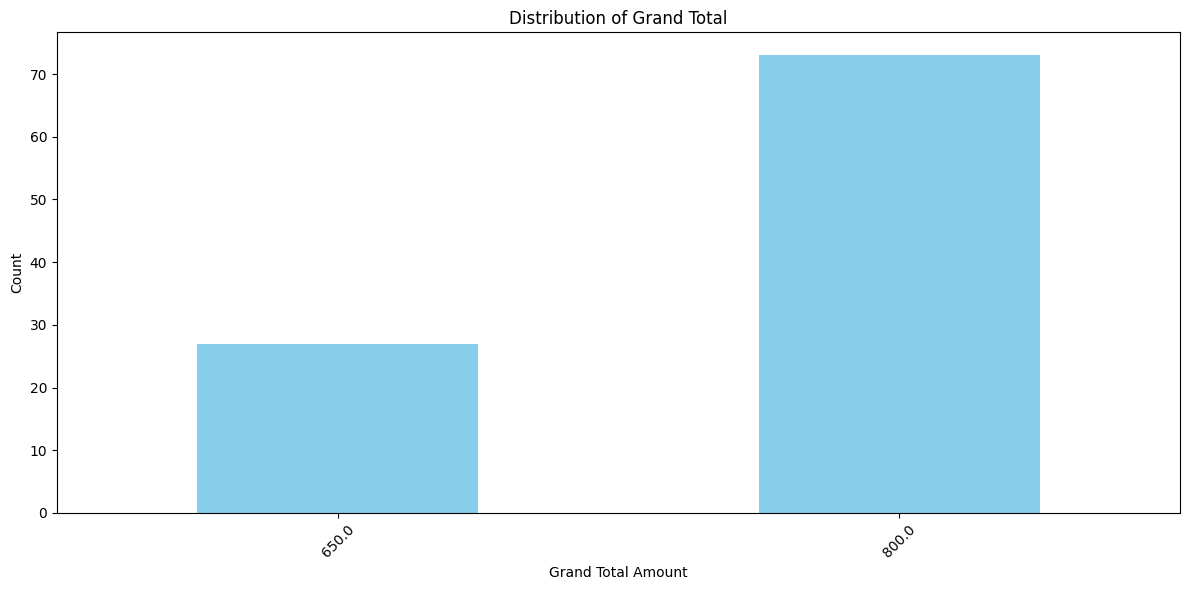

In [18]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the MySQL database
connection = mysql.connector.connect(
    user='root',
    password='Pavani@8902',
    host='localhost',
    database='healthcarecenterdata'
)

# Query data from the 'total_bill' table
query = '''
SELECT DISTINCT patient_Id, Grand_total
FROM total_bill
LIMIT 100
'''

# Fetch data into a DataFrame
df = pd.read_sql_query(query, connection)

# Close the connection as it is no longer needed for the following steps
connection.close()

# Step 2: Transform data
# Count the occurrences of each grand total
grand_total_counts = df['Grand_total'].value_counts().sort_index()

# Step 3: Plot the bar graph
plt.figure(figsize=(12, 6))
grand_total_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Grand Total')
plt.xlabel('Grand Total Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\pavan\AppData\Local\Temp\ipykernel_8724\1786415069.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


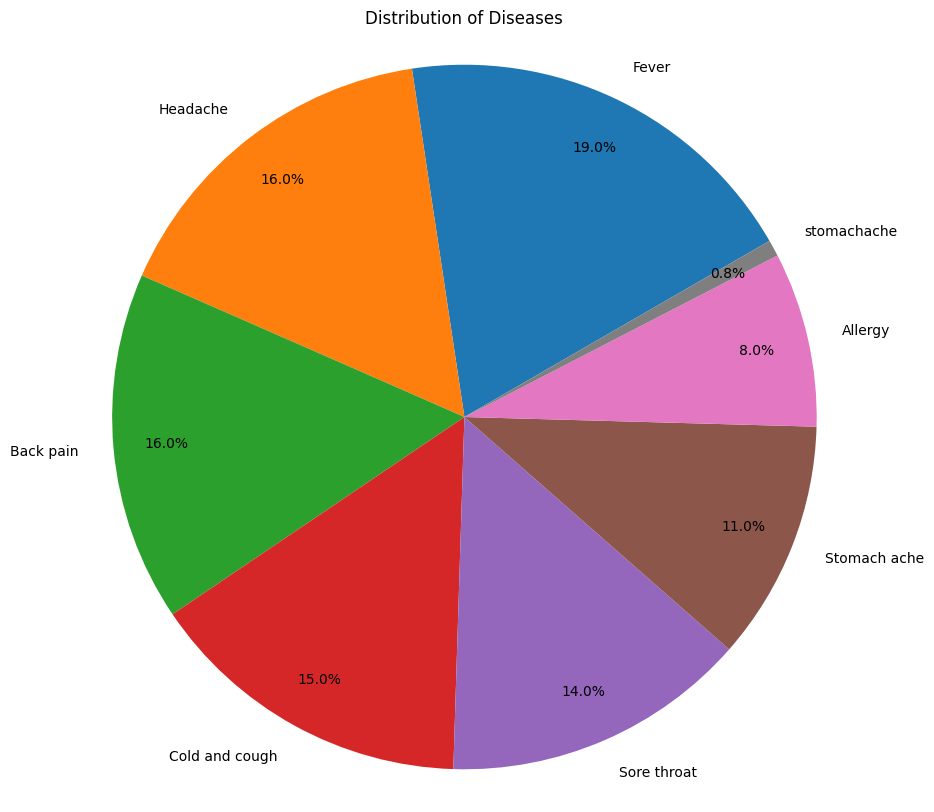

In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the MySQL database
connection = mysql.connector.connect(
    user='root',
    password='Pavani@8902',
    host='localhost',
    database='healthcarecenterdata'
)

# Query data from the 'prescription' table
query = 'SELECT Disease FROM prescription'

# Fetch data into a DataFrame
df = pd.read_sql_query(query, connection)

# Close the connection as it is no longer needed for the following steps
connection.close()

# Step 2: Transform data
# Count the occurrences of each disease
disease_counts = df['Disease'].value_counts()

# Step 3: Plot the pie chart
plt.figure(figsize=(10, 10))
patches, texts, autotexts = plt.pie(disease_counts.values, labels=disease_counts.index, startangle=30, autopct='%1.1f%%', pctdistance=0.85)
plt.title('Distribution of Diseases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


C:\Users\pavan\AppData\Local\Temp\ipykernel_8348\3286639775.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


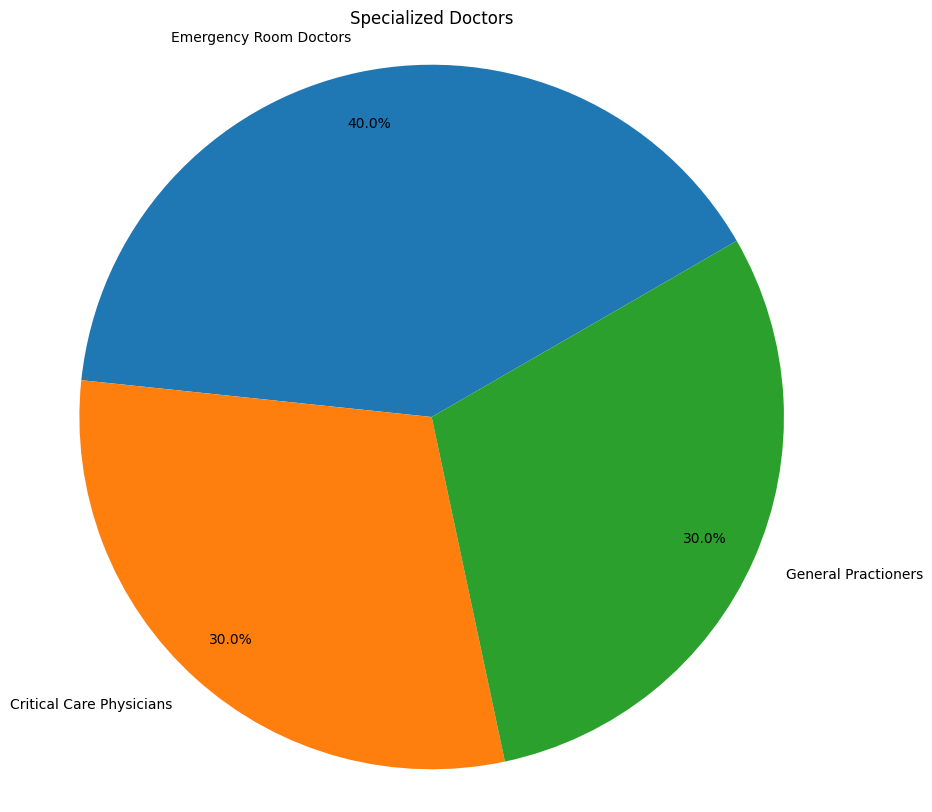

In [15]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the MySQL database
connection = mysql.connector.connect(
    user='root',
    password='Pavani@8902',
    host='localhost',
    database='healthcarecenterdata'
)

# Query data from the 'doctors' table
query = 'SELECT Specialization FROM doctors'

# Fetch data into a DataFrame
df = pd.read_sql_query(query, connection)

# Close the connection as it is no longer needed for the following steps
connection.close()

# Step 2: Transform data
# Count the percentage of Specialization of doctors
specialization_counts = df['Specialization'].value_counts()

# Step 3: Plot the pie chart
plt.figure(figsize=(10, 10))
patches, texts, autotexts = plt.pie(specialization_counts.values, labels=specialization_counts.index, startangle=30, autopct='%1.1f%%', pctdistance=0.85)
plt.title('Specialized Doctors')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


C:\Users\pavan\AppData\Local\Temp\ipykernel_8348\724169342.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


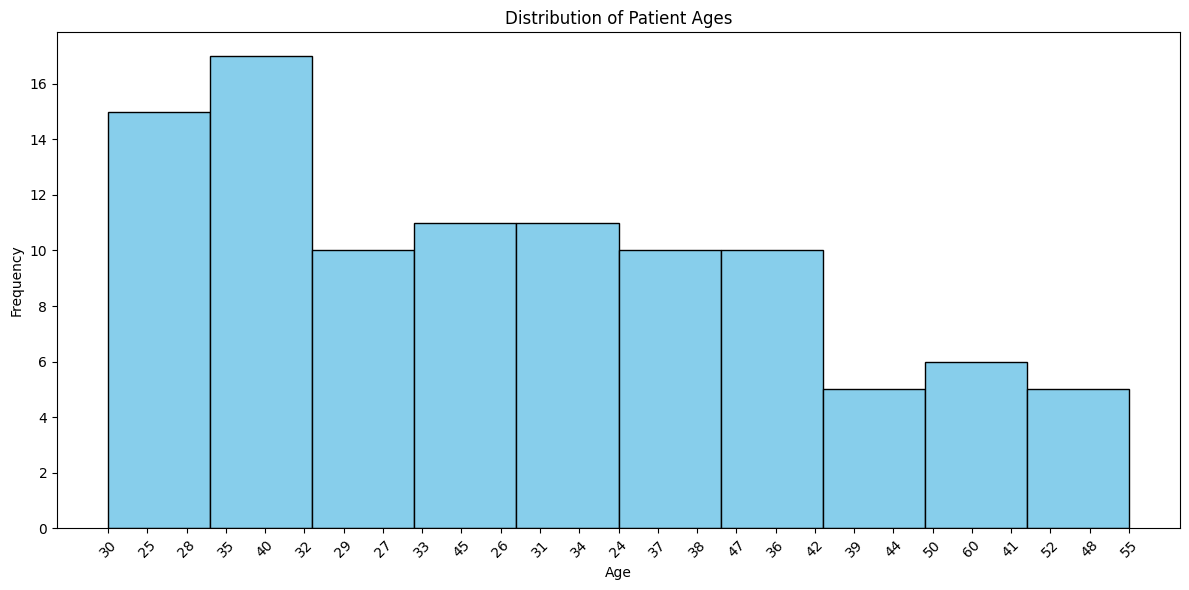

In [19]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the MySQL database
connection = mysql.connector.connect(
    user='root',
    password='Pavani@8902',
    host='localhost',
    database='healthcarecenterdata'
)

# Query data from the 'patients' table
query = 'SELECT age FROM patients'

# Fetch data into a DataFrame
df = pd.read_sql_query(query, connection)

# Close the connection as it is no longer needed for the following steps
connection.close()

# Step 2: Transform data
# Get the ages from the DataFrame
ages = df['age']

# Step 3: Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(ages, bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\pavan\AppData\Local\Temp\ipykernel_8724\972146364.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


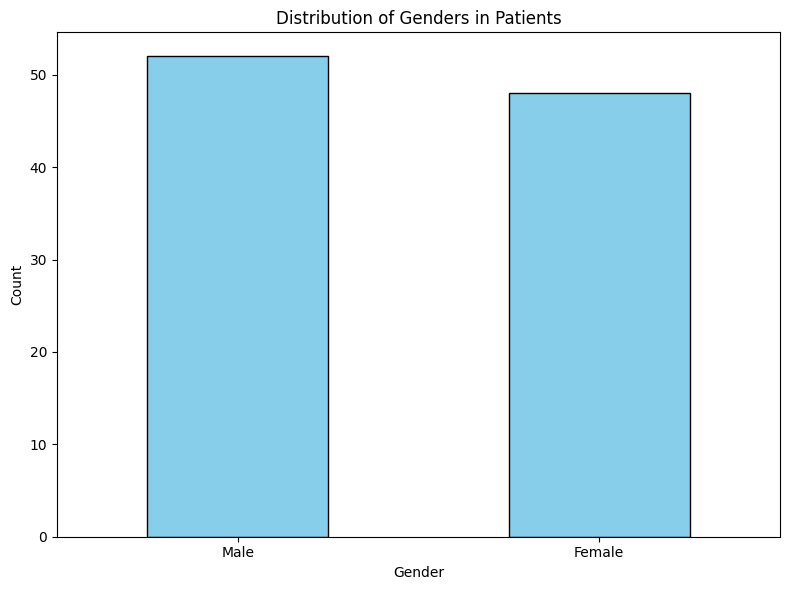

In [4]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the MySQL database
connection = mysql.connector.connect(
    user='root',
    password='Pavani@8902',
    host='localhost',
    database='healthcarecenterdata'
)

# Query data from the 'patients' table
query = 'SELECT gender FROM patients'

# Fetch data into a DataFrame
df = pd.read_sql_query(query, connection)

# Close the connection as it is no longer needed for the following steps
connection.close()

# Step 2: Transform data
# Count the occurrences of each gender
gender_counts = df['gender'].value_counts()

# Step 3: Plot the bar graph
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Genders in Patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\pavan\AppData\Local\Temp\ipykernel_8348\1115632619.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


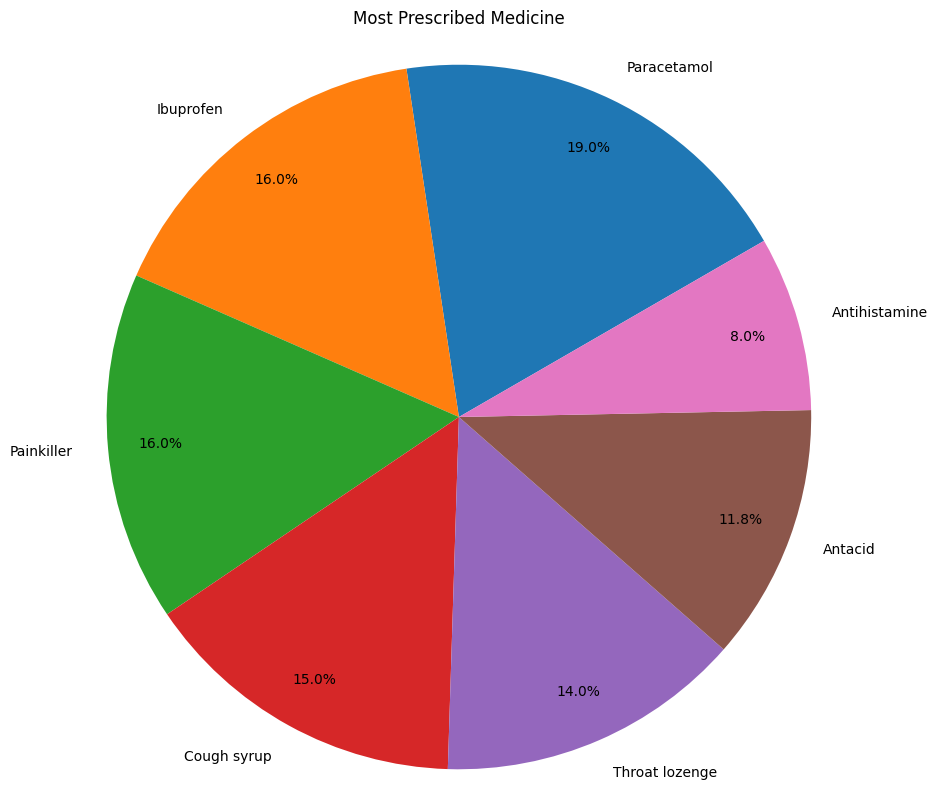

In [37]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the MySQL database
connection = mysql.connector.connect(
    user='root',
    password='Pavani@8902',
    host='localhost',
    database='healthcarecenterdata'
)

# Query data from the 'prescription' table
query = 'SELECT Medicines FROM prescription'

# Fetch data into a DataFrame
df = pd.read_sql_query(query, connection)

# Close the connection as it is no longer needed for the following steps
connection.close()

# Step 2: Transform data
# Count the percentage of Occurence  of medicines
medicines_counts = df['Medicines'].value_counts()

# Step 3: Plot the pie chart
plt.figure(figsize=(10, 10))
patches, texts, autotexts = plt.pie(medicines_counts.values, labels=medicines_counts.index, startangle=30, autopct='%1.1f%%', pctdistance=0.85)
plt.title('Most Prescribed Medicine')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

C:\Users\pavan\AppData\Local\Temp\ipykernel_8348\1162366701.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


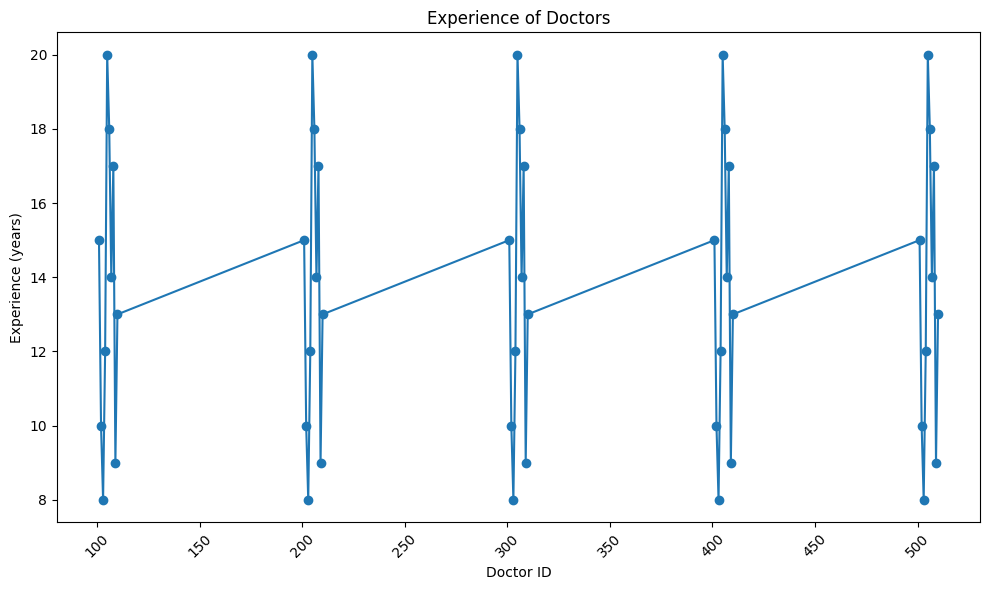

In [34]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the MySQL database
connection = mysql.connector.connect(
    user='root',
    password='Pavani@8902',
    host='localhost',
    database='healthcarecenterdata'
)

# Query to retrieve data (assuming 'Experience' is a column in your 'doctors' table)
query = "SELECT doctorID, Experience FROM doctors"

# Read data into a DataFrame
df = pd.read_sql_query(query, connection)

# Close the connection
connection.close()

# Convert 'Experience' column to numeric (remove ' years' from strings)
df['Experience'] = pd.to_numeric(df['Experience'].str.replace(' years', ''))

# Sort by doctorID for a meaningful line graph
df.sort_values(by='doctorID', inplace=True)

# Line graph
plt.figure(figsize=(10, 6))
plt.plot(df['doctorID'], df['Experience'], marker='o')
plt.title('Experience of Doctors')
plt.xlabel('Doctor ID')
plt.ylabel('Experience (years)')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


C:\Users\pavan\AppData\Local\Temp\ipykernel_8348\3476320919.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


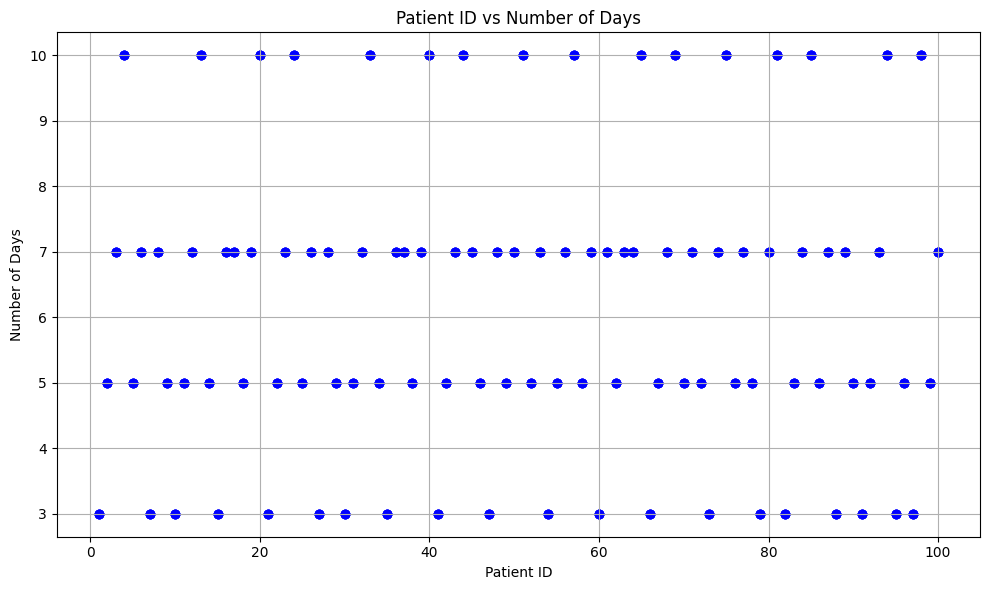

In [39]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the MySQL database
connection = mysql.connector.connect(
    user='root',
    password='Pavani@8902',
    host='localhost',
    database='healthcarecenterdata'
)

# Query to retrieve data from the 'prescription' table
query = "SELECT patient_Id, Number_of_days FROM prescription"

# Read data into a DataFrame
df = pd.read_sql_query(query, connection)

# Close the connection
connection.close()

# Scatter plot for patient ID vs Number_of_days
plt.figure(figsize=(10, 6))
plt.scatter(df['patient_Id'], df['Number_of_days'], color='blue', marker='o')
plt.title('Patient ID vs Number of Days')
plt.xlabel('Patient ID')
plt.ylabel('Number of Days')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


C:\Users\pavan\AppData\Local\Temp\ipykernel_8348\194079310.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


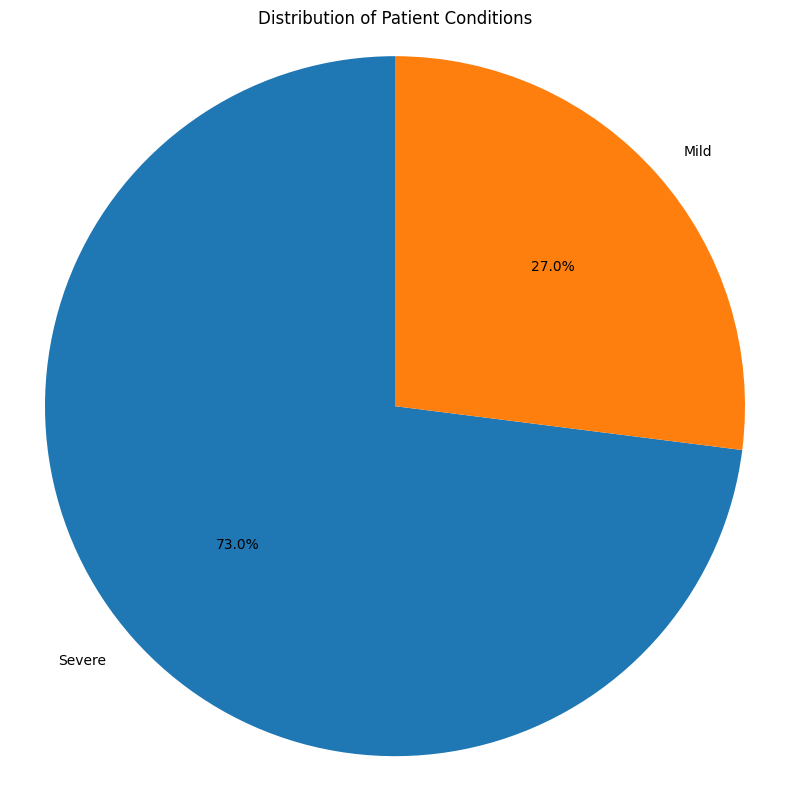

In [41]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the MySQL database
connection = mysql.connector.connect(
    user='root',
    password='Pavani@8902',
    host='localhost',
    database='healthcarecenterdata'
)

# Query to retrieve data from the 'treatment_status' table
query = "SELECT patient_condition FROM treatment_status"

# Read data into a DataFrame
df = pd.read_sql_query(query, connection)

# Close the connection
connection.close()

# Count the occurrences of each patient condition
condition_counts = df['patient_condition'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Patient Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()

# Show plot
plt.show()



C:\Users\pavan\AppData\Local\Temp\ipykernel_8348\2365469765.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


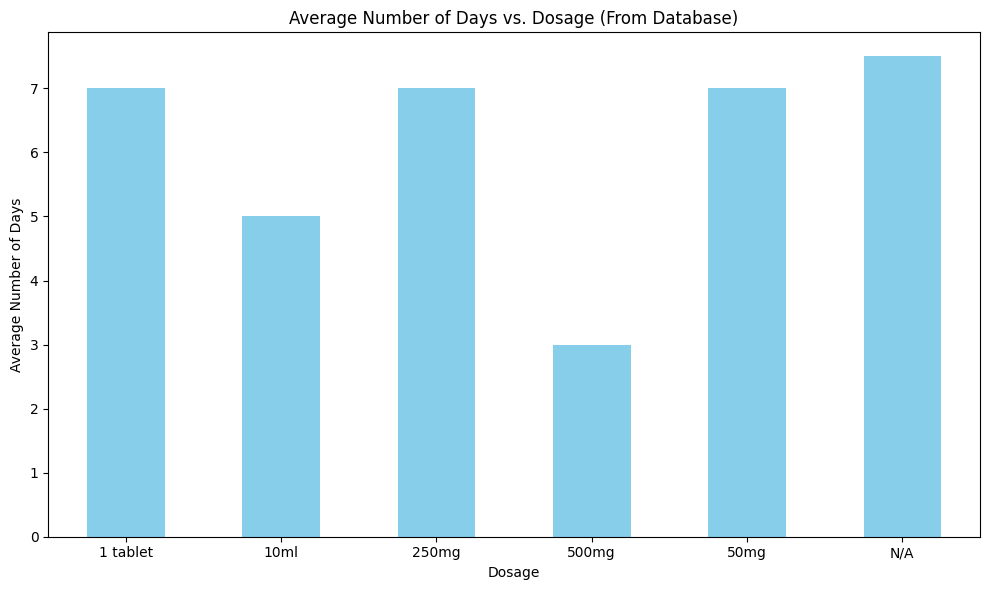

In [46]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the MySQL database
connection = mysql.connector.connect(
    user='root',
    password='Pavani@8902',
    host='localhost',
    database='healthcarecenterdata'
)

# Query data for patient Id, Dosage, and Number of days from your database
query = "SELECT patient_Id, Dosage, Number_of_days FROM prescription"

# Read data into a DataFrame
df = pd.read_sql_query(query, connection)

# Close the connection
connection.close()

# Calculate average number of days for each dosage category
avg_days_per_dosage = df.groupby('Dosage')['Number_of_days'].mean()

# Create bar graph
plt.figure(figsize=(10, 6))
avg_days_per_dosage.plot(kind='bar', color='skyblue')
plt.title('Average Number of Days vs. Dosage (From Database)')
plt.xlabel('Dosage')
plt.ylabel('Average Number of Days')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Step 6: Conclusion

From the above analysis, we can gain a clear view of seasonal diseases and their severity. We can also identify the most common diseases people suffer from and determine which age groups are most affected during seasonal changes. Additionally, the data allows us to gather comprehensive insights into Patients, Doctors, Medical Reports, Treatment Status, Prescriptions, Billing, and the frequency of prescribed medicines.